<h1 align='center'>Image and Video Processing Assignment 1</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Table of Contents
- [Importing Libraries](#1)
- [Question 1 - The Human Eye](#2)
- [Question 2 - Gray Scale Images](#3)
    - [Reading and Displaying images](#4)
    - [Maximum, Minimum and Resolution of image](#5)
    - [Size and Efficiency of the compressed image](#6)
    - [Displaying the bit plane of any image](#7)
-[Question 3 - Binary Image Processing](#8)
    - [Histogram of an Image](#9)
    - [Modality of the Histogram](#10)
    - [Modal Thresholding of an Image](#11)
    - [Otsu's Algorithm - Part (a)](#12)
    - [Otsu's Algorithm - Part (b)](#13)
    - [Connected Components Algorithm](#14)
    - [Minor Blob Removal Algorithm](#15)
-[Question 4 - Binary Morphology](#16)
    - [Dialate, Erode and Median filters](#17)
    - [Testing filters on images](#18)
    - [Verification of duality](#19)
        - [Dialate Filter](#20)
        - [Erode Filter](#21)
        - [Median Filter](#22)
    - [Open and Close compound operators](#23)
    - [Open-Clos and Clos-Open operators](#24)
    - [Pixel count in object of interest](#25)

<a name = '1'></a>
# Importing Libraries 

In [1]:
import numpy as np
from math import pi
import matplotlib.image as img
import matplotlib.pyplot as plt
import os

<a name = '2'></a>
# Question 1 - The Human Eye

In [2]:
width, height = map(float, input("Please enter the size of TV (as W X H in inches): ").split("X"))
Wpx, Hpx = map(float, input("Please enter the resolution of TV (as Wpx X Hpx in pixels): ").split("X"))
available_distance = float(input("Please enter the available distance (in inches): "))

spatial_frequency = 6
optimal_distance = width * spatial_frequency / (np.tan(pi / 360) * Wpx)

distance = min(optimal_distance, available_distance)
print(f"\nThe couch should be placed at a distance of {round(distance, 4)} inches in front of the TV.")

Please enter the size of TV (as W X H in inches): 50 X 35
Please enter the resolution of TV (as Wpx X Hpx in pixels): 1920 X 1080
Please enter the available distance (in inches): 25

The couch should be placed at a distance of 17.9045 inches in front of the TV.


<a name = '3'></a>
# Question 2 - Gray Scale Images

## Reading and Displaying images <a name = '4'></a>

In [3]:
aerial = img.imread('5.1.10.tiff')
airplane = img.imread('7.1.02.tiff')
apc = img.imread('7.1.08.tiff')

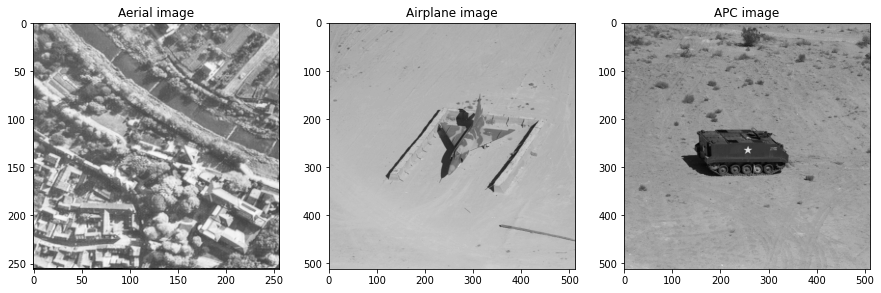

In [4]:
fig = plt.figure(figsize = (15, 15))

plt.subplot(1, 3, 1)
plt.title("Aerial image")
plt.imshow(aerial, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("Airplane image")
plt.imshow(airplane, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("APC image")
plt.imshow(apc, cmap = 'gray')

plt.show()

## Maximum, Minimum and Resolution of image <a name = '5'></a>

In [5]:
print(f"For Aerial image-")
print(f"Maximum: {max(aerial.flatten())}")
print(f"Minimum: {min(aerial.flatten())}")
print(f"Bits used per pixel: {int(np.ceil(np.log2(max(aerial.flatten()))))}")
print(f"Resolution: {aerial.shape}")

print(f"\n\nFor Airplane image-")
print(f"Maximum: {max(airplane.flatten())}")
print(f"Minimum: {min(airplane.flatten())}")
print(f"Bits used per pixel: {int(np.ceil(np.log2(max(airplane.flatten()))))}")
print(f"Resolution: {airplane.shape}")

print(f"\n\nFor APC image-")
print(f"Maximum: {max(apc.flatten())}")
print(f"Minimum: {min(apc.flatten())}")
print(f"Bits used per pixel: {int(np.ceil(np.log2(max(apc.flatten()))))}")
print(f"Resolution: {apc.shape}")

For Aerial image-
Maximum: 248
Minimum: 1
Bits used per pixel: 8
Resolution: (256, 256)


For Airplane image-
Maximum: 250
Minimum: 3
Bits used per pixel: 8
Resolution: (512, 512)


For APC image-
Maximum: 215
Minimum: 12
Bits used per pixel: 8
Resolution: (512, 512)


## Size and Efficiency of the compressed image <a name = '6'></a>

In [6]:
print(f"Size of compressed Aerial image: {os.stat('5.1.10.tiff').st_size} bytes")
print(f"Efficiency of compression for aerial image: "
      f"{round((((aerial.size - os.stat('5.1.10.tiff').st_size) / aerial.size) * 100), 3)}%")

print(f"\nSize of compressed Airplane image: {os.stat('7.1.02.tiff').st_size} bytes")
print(f"Efficiency of compression for aerial image: "
      f"{round((((airplane.size - os.stat('7.1.02.tiff').st_size) / airplane.size) * 100), 3)}%")

print(f"\nSize of compressed APC image: {os.stat('7.1.08.tiff').st_size} bytes")
print(f"Efficiency of compression for aerial image: "
      f"{round((((apc.size - os.stat('7.1.08.tiff').st_size) / apc.size) * 100), 3)}%")

Size of compressed Aerial image: 65670 bytes
Efficiency of compression for aerial image: -0.204%

Size of compressed Airplane image: 262278 bytes
Efficiency of compression for aerial image: -0.051%

Size of compressed APC image: 262278 bytes
Efficiency of compression for aerial image: -0.051%


## Displaying the bit plane of any image <a name = '7'></a>

In [7]:
def returnBitPlaneImage(image, b):
    image = np.array(image)
    bitplane_image = np.array((image >> b) % 2)
    return bitplane_image

Bit planes for Aerial image


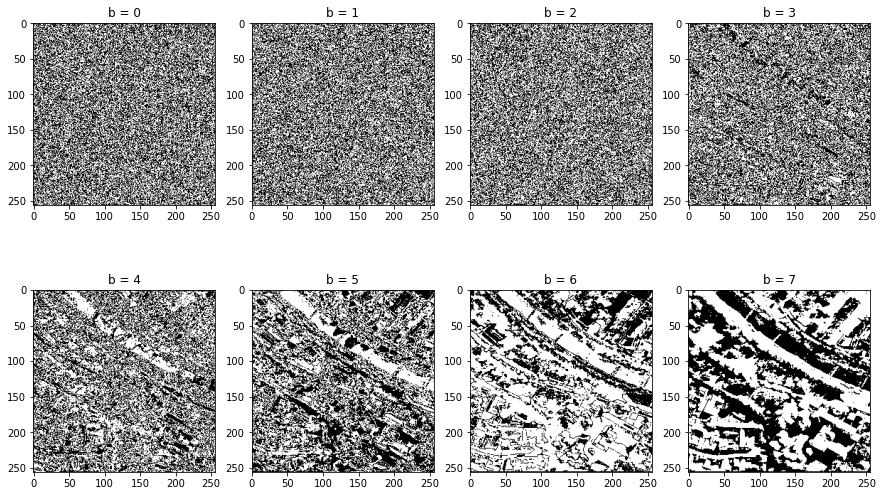

In [8]:
fig = plt.figure(figsize = (15, 9))
print("Bit planes for Aerial image")
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.title(f"b = {i}")
    plt.imshow(returnBitPlaneImage(aerial, i), cmap = 'gray')
plt.show()

Bit planes for Airplane image


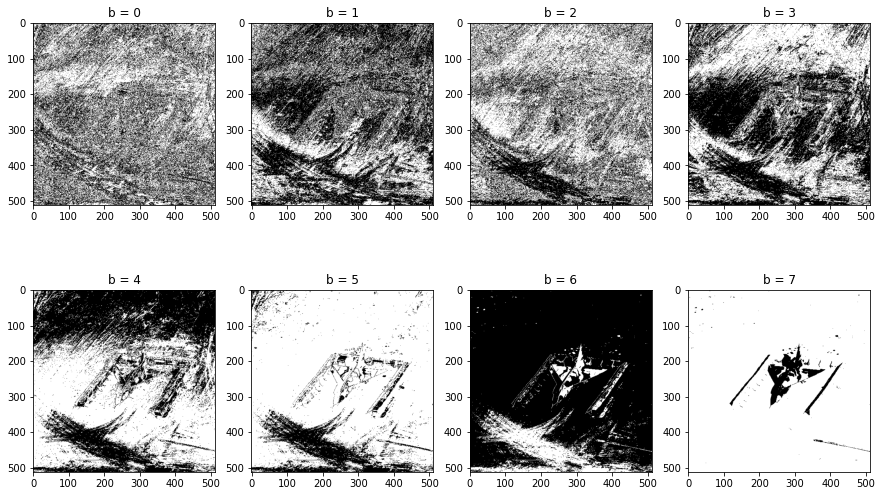

In [9]:
fig = plt.figure(figsize = (15, 9))
print("Bit planes for Airplane image")
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.title(f"b = {i}")
    plt.imshow(returnBitPlaneImage(airplane, i), cmap = 'gray')
plt.show()

Bit planes for APC image


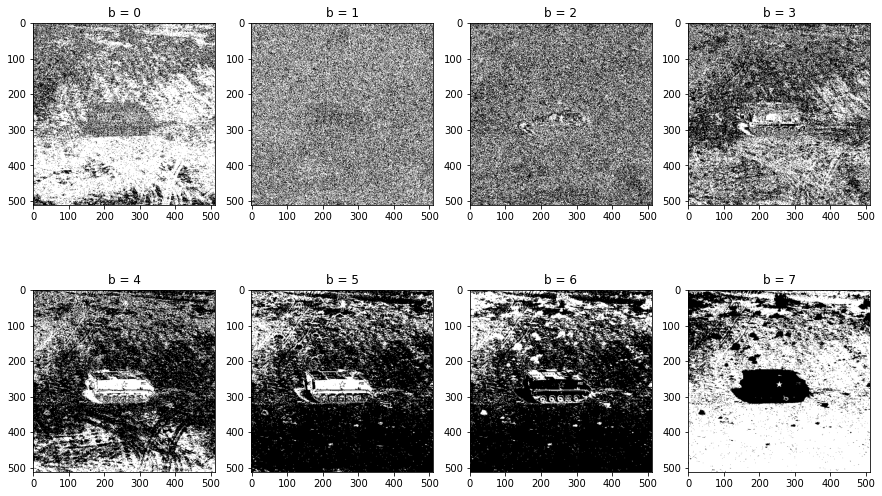

In [10]:
fig = plt.figure(figsize = (15, 9))
print("Bit planes for APC image")
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.title(f"b = {i}")
    plt.imshow(returnBitPlaneImage(apc, i), cmap = 'gray')
plt.show()

<a name = '8'></a>
# Question 3 - Binary Image Processing 

## Histogram of an Image <a name = '9'></a>

In [11]:
def returnHistogram(image, title, plot):
    
    hist_length = 2 ** int(np.ceil(np.log2(max(image.flatten()))))
    histogram = np.zeros(hist_length)
    
    for i in np.array(image).flatten():
        histogram[i] += 1
    
    if plot == True:
        fig = plt.figure(figsize = (15, 4))
        plt.title(title)
        plt.xlabel("Pixel Intensity in Gray level")
        plt.ylabel("Count")
        plt.plot(np.arange(0, hist_length, 1), histogram)
        plt.show()
    
    return histogram

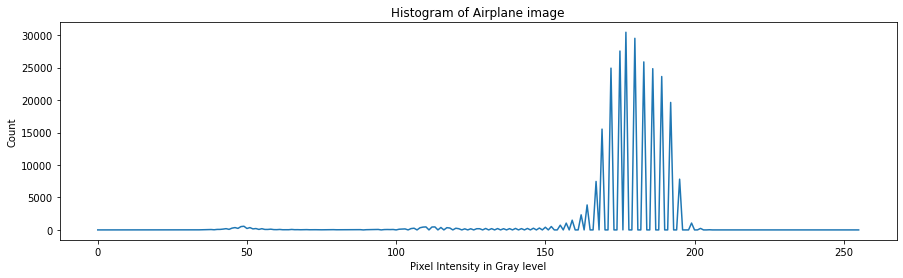

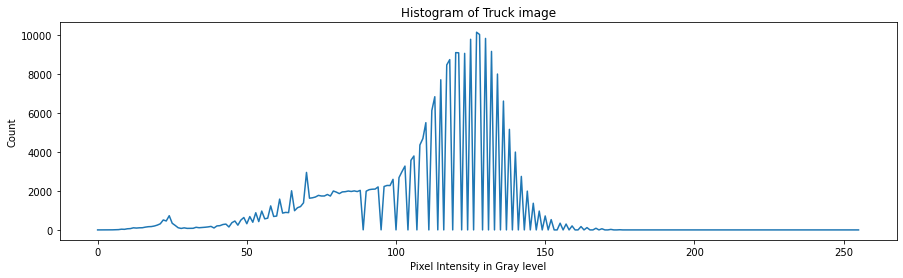

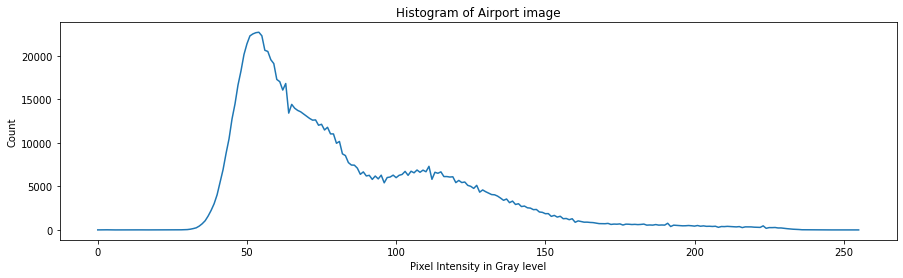

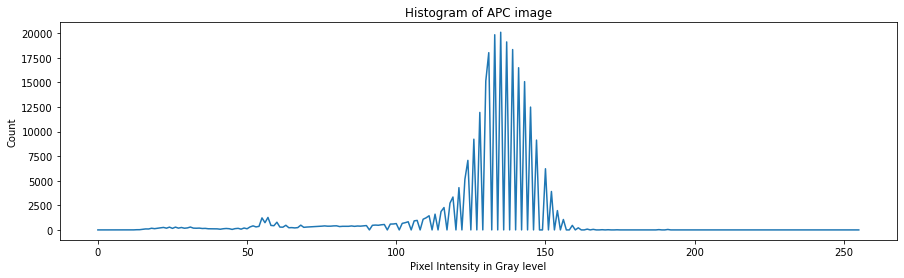

In [12]:
airplane = img.imread('7.1.02.tiff')
truck = img.imread('7.1.01.tiff')
airport = img.imread('5.3.02.tiff')
apc = img.imread('7.1.08.tiff')

airplane_hist = returnHistogram(airplane, "Histogram of Airplane image", plot = True)
truck_hist = returnHistogram(truck, "Histogram of Truck image", plot = True)
airport_hist = returnHistogram(airport, "Histogram of Airport image", plot = True)
apc_hist = returnHistogram(apc, "Histogram of APC image", plot = True)

## Modality of the Histogram <a name = '10'></a>

In [13]:
airplane_mode = np.argmax(airplane_hist) + 1
truck_mode = np.argmax(truck_hist) + 1
airport_mode = np.argmax(airport_hist) + 1
apc_mode = np.argmax(apc_hist) + 1

print(f"The Modality of Airplane image is: {airplane_mode}")
print(f"The Modality of Truck image is: {truck_mode}")
print(f"The Modality of Airport image is: {airport_mode}")
print(f"The Modality of APC image is: {apc_mode}")

The Modality of Airplane image is: 178
The Modality of Truck image is: 128
The Modality of Airport image is: 55
The Modality of APC image is: 136


## Modal Thresholding of an Image <a name = '11'></a>

In [14]:
def returnModalThreshold(image, threshold, name):
    binary_image = np.zeros(image.shape)
    n, m = image.shape
    
    for i in range(n):
        for j in range(m):
            if image[i][j] >= threshold:
                binary_image[i][j] = 1

    fig = plt.figure(figsize = (15, 14))
    
    plt.subplot(1, 2, 1)
    plt.title(f"Original {name} image")
    plt.imshow(image, cmap = 'gray')

    plt.subplot(1, 2, 2)
    plt.title(f"Binarised {name} image")
    plt.imshow(binary_image, cmap = 'gray')
    
    plt.show()
    
    return binary_image

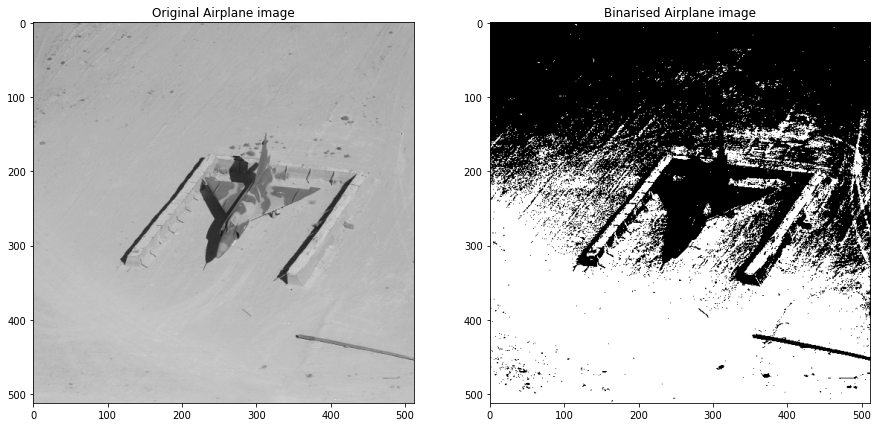

In [15]:
airplane_binary = returnModalThreshold(airplane, airplane_mode, "Airplane")

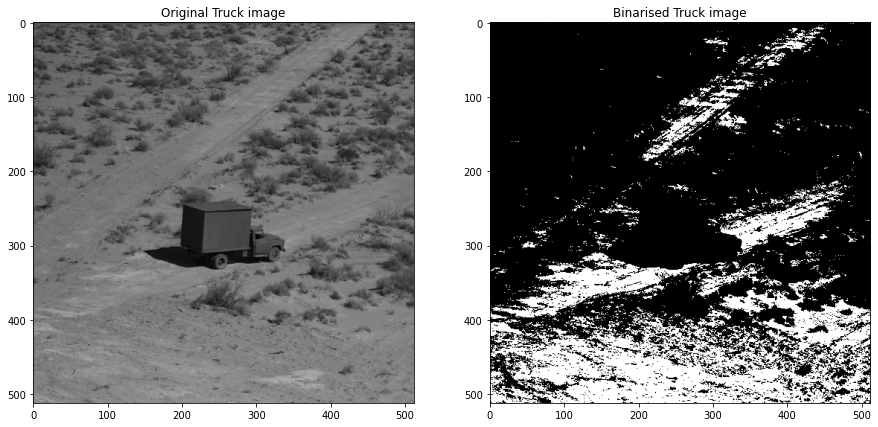

In [16]:
truck_binary = returnModalThreshold(truck, truck_mode, "Truck")

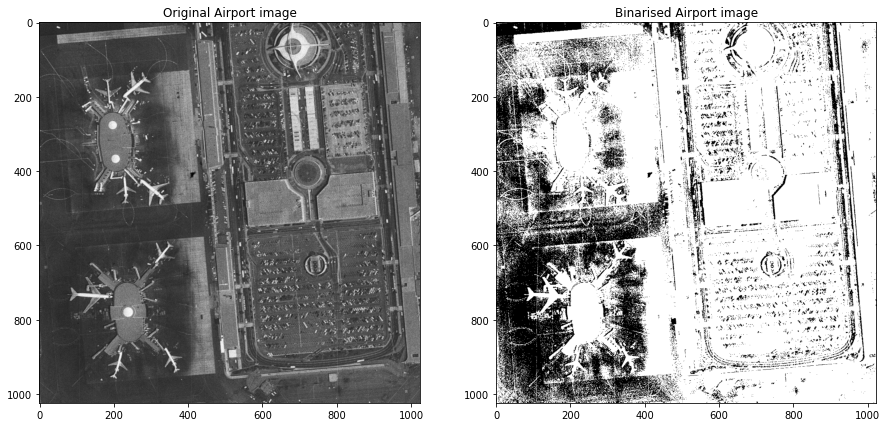

In [17]:
airport_binary = returnModalThreshold(airport, airport_mode, "Airport")

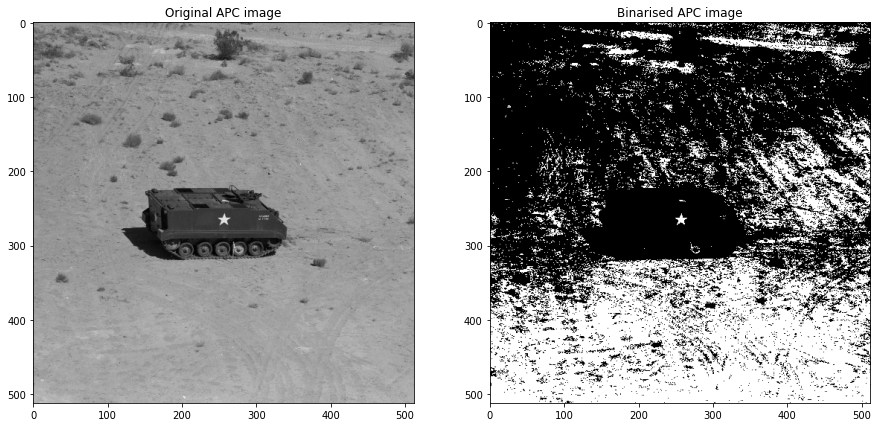

In [18]:
apc_binary = returnModalThreshold(apc, apc_mode, "APC")

## Otsu's Algorithm - Part (a) <a name = '12'></a>

In [19]:
def returnP(image, threshold):
    image_histogram_norm = (returnHistogram(image, " ", plot = False) / (image.shape[0] * image.shape[1]))
    P0 = np.sum(image_histogram_norm[:threshold])
    P1 = 1 - P0
    return P0, P1

def returnSigma(image, threshold):
    flatten_image = image.flatten()
    below_t = []
    above_t = []
    for i in flatten_image:
        if i < threshold:
            below_t.append(i)
        else:
            above_t.append(i)
    var_0, var_1 = 0, 0
    if len(below_t) > 0:
        var_0 = np.var(np.array(below_t))
    if len(above_t) > 0:
        var_1 = np.var(np.array(above_t))
    return var_0, var_1

def returnThreshold(image):
    max_val = 2 ** (int(np.ceil(np.log2(max(image.flatten())))))
    sigma_w = []
    for i in range(max_val):
        P0, P1 = returnP(image, i)
        var_0, var_1 = returnSigma(image, i)
        sigma_w.append(P0 * var_0 + P1 * var_1)
    opt_threshold = np.argmin(sigma_w)
    return opt_threshold

The Optimal Threshold for APC image from Otsu's Algorithm part  is: 100


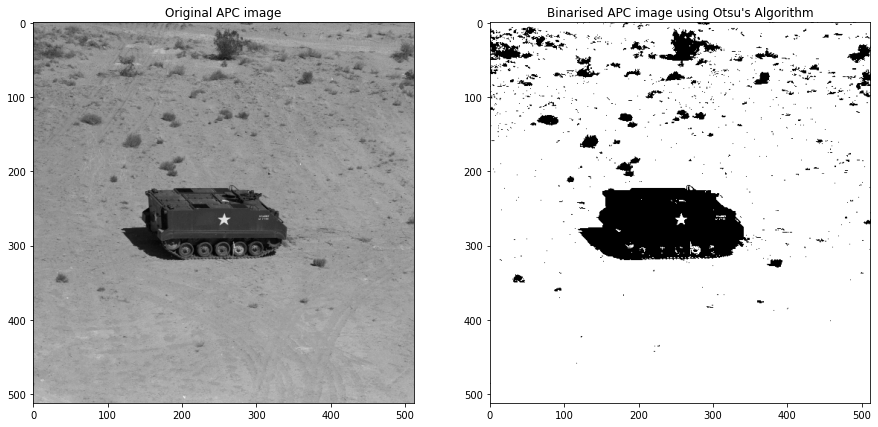

In [20]:
apc_opt_threshold = returnThreshold(apc)

print(f"The Optimal Threshold for APC image from Otsu's Algorithm part  is: {apc_opt_threshold}")

apc_binary_image = np.zeros(apc.shape)
n, m = apc.shape
    
for i in range(n):
    for j in range(m):
        if apc[i][j] >= apc_opt_threshold:
            apc_binary_image[i][j] = 1

fig = plt.figure(figsize = (15, 14))
    
plt.subplot(1, 2, 1)
plt.title(f"Original APC image")
plt.imshow(apc, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Binarised APC image using Otsu's Algorithm")
plt.imshow(apc_binary_image, cmap = 'gray')
    
plt.show()

## Otsu's Algorithm - Part (b) <a name = '13'></a>

In [21]:
def returnOtsuPartB(image):
    image_histogram_norm = (returnHistogram(image, " ", plot = False) / (image.shape[0] * image.shape[1]))
    max_val = 2 ** (int(np.ceil(np.log2(max(image.flatten())))))
    mu = np.mean(image.flatten())
    P0, mu0, mu1 = [image_histogram_norm[0]], [0], [mu / (1 - image_histogram_norm[0])]
    sigma_b = [(mu ** 2) *  image_histogram_norm[0] / (1 - image_histogram_norm[0])]
    for t in range(1, max_val):
        P0_t1 = P0[t - 1] + image_histogram_norm[t]
        P0.append(P0_t1)
        if P0_t1 == 0:
            mu0_t1 = 0
        else:
            mu0_t1 = ((mu0[t - 1] * P0[t - 1]) + (t * image_histogram_norm[t])) / P0_t1
        mu0.append(mu0_t1)
        if P0_t1 == 1:
            mu1_t1 = mu1[0]
        else:
            mu1_t1 = (mu - mu0_t1 * P0_t1) / (1 - P0_t1)
        mu1.append(mu1_t1)
        sigma_b_t1 = P0_t1 * (1 - P0_t1) * ((mu0_t1 - mu1_t1) ** 2)
        sigma_b.append(sigma_b_t1)
    opt_threshold = np.argmax(sigma_b)
    return opt_threshold

The Optimal Threshold for APC image from Otsu's Algorithm part (b) is: 99


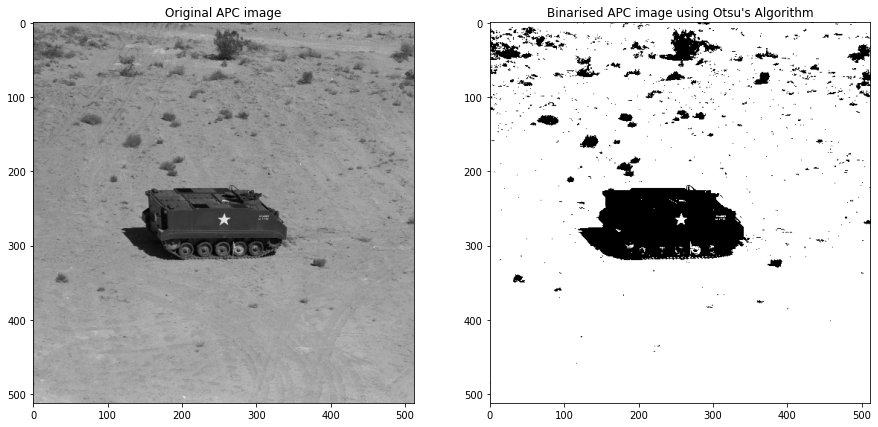

In [22]:
apc_opt_threshold = returnOtsuPartB(apc)

print(f"The Optimal Threshold for APC image from Otsu's Algorithm part (b) is: {apc_opt_threshold}")

apc_binary_image = np.zeros(apc.shape)
n, m = apc.shape
    
for i in range(n):
    for j in range(m):
        if apc[i][j] >= apc_opt_threshold:
            apc_binary_image[i][j] = 1

fig = plt.figure(figsize = (15, 14))
    
plt.subplot(1, 2, 1)
plt.title(f"Original APC image")
plt.imshow(apc, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Binarised APC image using Otsu's Algorithm")
plt.imshow(apc_binary_image, cmap = 'gray')
    
plt.show()

## Connected Components Algorithm <a name = '14'></a>

In [23]:
def returnLinkedRegions(region_color, top, left):
    larger = max(top, left)
    smaller = min(top, left)
    region_color[region_color == larger] = smaller
    return region_color

def returnConnectedComponents(image):
    region_color = np.zeros(image.shape)
    k = 1
    n, m = image.shape
    for i in range(1, n):
        for j in range(1, m):    
            if image[i][j] == 0:
                top = image[i - 1][j] 
                left = image[i][j - 1]
                if top == 1 and left == 1:
                    region_color[i][j] = k
                    k += 1
                elif top == 0 and left == 1:
                    region_color[i][j] = region_color[i - 1][j]
                elif top == 1 and left == 0:
                    region_color[i][j] = region_color[i][j - 1]
                elif top == 0 and left == 0:
                    region_color[i][j] = min(region_color[i - 1][j], region_color[i][j - 1])
                    if region_color[i - 1][j] != region_color[i][j - 1]:
                        region_color = returnLinkedRegions(region_color, region_color[i - 1][j], 
                                                           region_color[i][j - 1])
    return region_color

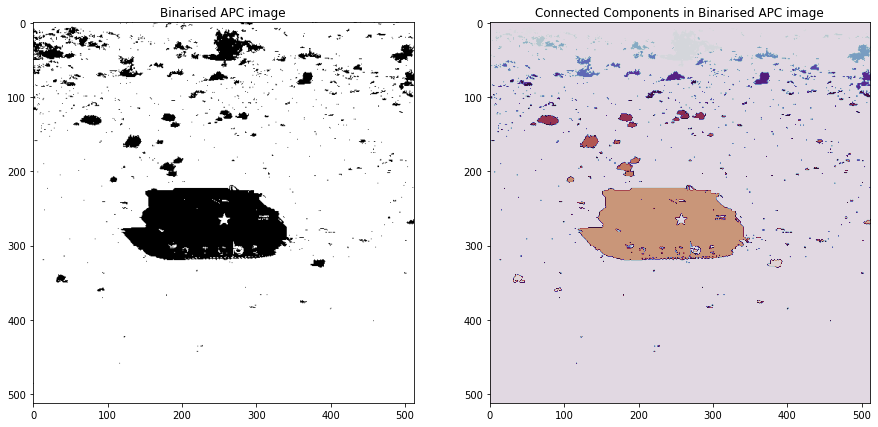

In [24]:
apc_labeled_image = returnConnectedComponents(apc_binary_image)

fig = plt.figure(figsize = (15, 14))
    
plt.subplot(1, 2, 1)
plt.title(f"Binarised APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Connected Components in Binarised APC image")
plt.imshow(apc_labeled_image, cmap = 'twilight')
    
plt.show()

## Minor Blob Removal Algorithm <a name = '15'></a>

In [25]:
def returnMinorBlobRemoved(binary_image, component_number, arg = -2):
    n, m = binary_image.shape
    
    unique_labels, count = np.unique(component_number, return_counts = True)
    # Not the first most common one as it will be the background
    max_count = sorted(count)[arg]
    max_label = unique_labels[np.where(count == max_count)]
    
    blob_removed_image = binary_image
    
    for i in range(n):
        for j in range(m):
            if binary_image[i][j] == 0:  
                if component_number[i][j] != max_label:
                    blob_removed_image[i][j] = 1
    return blob_removed_image

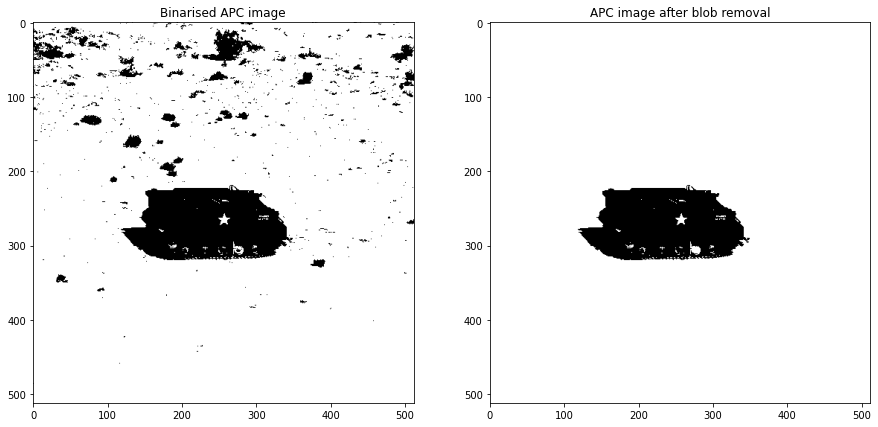

In [26]:
apc_blob_removed = returnMinorBlobRemoved(apc_binary_image.copy(), apc_labeled_image.copy())

fig = plt.figure(figsize = (15, 14))
    
plt.subplot(1, 2, 1)
plt.title(f"Binarised APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"APC image after blob removal")
plt.imshow(apc_blob_removed, cmap = 'gray')
    
plt.show()

print(f"The blob count i")

<a name = '16'></a>
# Question 4 - Binary Morphology

## Dialate, Erode and Median filters <a name = '17'></a>

In [27]:
def dialateFilter(image, window):
    l = len(window)
    dialated_image = np.zeros(image.shape)
    n, m = image.shape
    
    for i in range(n):
        for j in range(m):
            for elem in range(l):
                wi = i + window[elem][0]
                wj = j + window[elem][1]
                if wi >= 0 and wi < n and wj >= 0 and wj < m:
                    if image[wi][wj] == 1:
                        dialated_image[i][j] = 1
                        break
    return dialated_image

def erodeFilter(image, window):
    l = len(window)
    eroded_image = np.ones(image.shape)
    n, m = image.shape
    
    for i in range(n):
        for j in range(m):
            for elem in range(l):
                wi = i + window[elem][0]
                wj = j + window[elem][1]
                if wi >= 0 and wi < n and wj >= 0 and wj < m:
                    if image[wi][wj] == 0:
                        eroded_image[i][j] = 0
                        break
    return eroded_image

def medianFilter(image, window):
    l = len(window)
    median_image = np.zeros(image.shape)
    n, m = image.shape
    
    for i in range(n):
        for j in range(m):
            window_elems = []
            for elem in range(l):
                wi = i + window[elem][0]
                wj = j + window[elem][1]
                if wi >= 0 and wi < n and wj >= 0 and wj < m:
                    window_elems.append(image[wi][wj])
            w_l = len(window_elems)
            ones = sum(window_elems)
            if ones >= (w_l - ones):
                median_image[i][j] = 1
    return median_image

## Testing filters on images <a name = '18'></a>

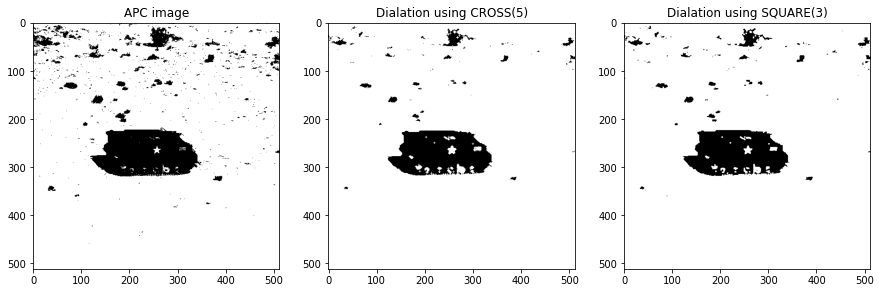

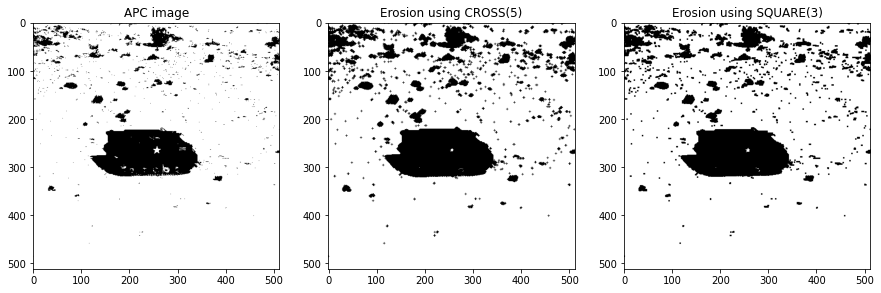

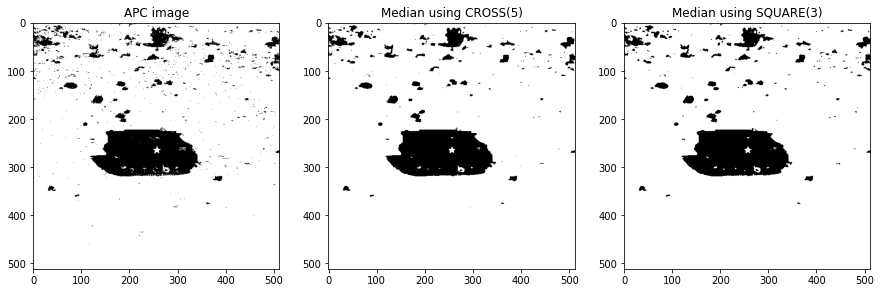

In [28]:
cross_5 = [[-2, 0], [-1, 0], [0, 0], [1, 0], [2, 0], [0, -2], [0, -1], [0, 1], [0, 2]]
square_3 = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 0], [0, 1], [1, -1], [1, 0], [1, 1]]

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Dialation using CROSS(5)")
plt.imshow(dialateFilter(apc_binary_image, cross_5), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Dialation using SQUARE(3)")
plt.imshow(dialateFilter(apc_binary_image, square_3), cmap = 'gray')

plt.show()

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Erosion using CROSS(5)")
plt.imshow(erodeFilter(apc_binary_image, cross_5), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Erosion using SQUARE(3)")
plt.imshow(erodeFilter(apc_binary_image, square_3), cmap = 'gray')

plt.show()

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Median using CROSS(5)")
plt.imshow(medianFilter(apc_binary_image, cross_5), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Median using SQUARE(3)")
plt.imshow(medianFilter(apc_binary_image, square_3), cmap = 'gray')
    
plt.show()

## Verification of duality <a name = '19'></a>

In [29]:
def complementImage(image):
    complemented_image = np.zeros(image.shape)
    n, m = image.shape
    for i in range(n):
        for j in range(m):
            if image[i][j] == 0:
                complemented_image[i][j] = 1
    return complemented_image

### Dialate filter <a name = '20'></a>

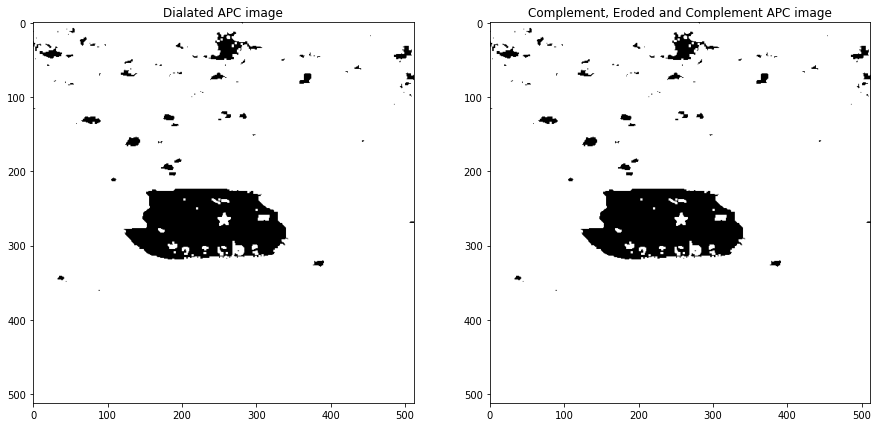

In [30]:
apc_dialated_image = dialateFilter(apc_binary_image, square_3)
apc_through_erode = complementImage(erodeFilter(complementImage(apc_binary_image), square_3))

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 2, 1)
plt.title(f"Dialated APC image")
plt.imshow(apc_dialated_image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Complement, Eroded and Complement APC image")
plt.imshow(apc_through_erode, cmap = 'gray')

plt.show()

Clearly the difference between images are zero

### Erode filter <a name = '21'></a>

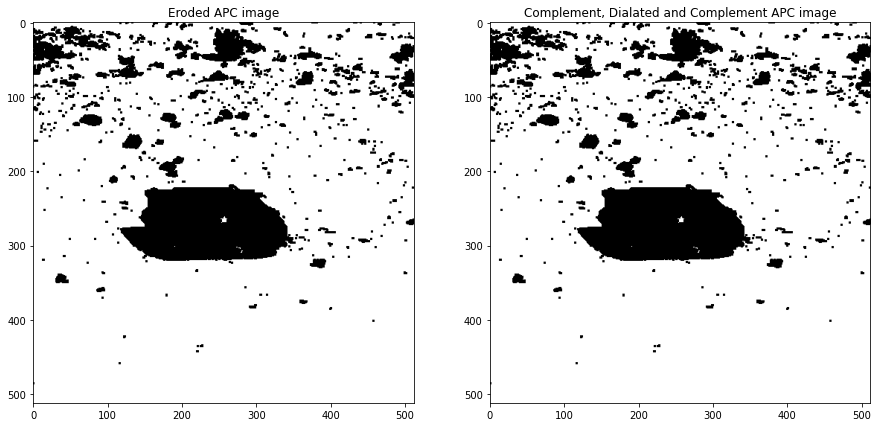

In [31]:
apc_eroded_image = erodeFilter(apc_binary_image, square_3)
apc_through_dialate = complementImage(dialateFilter(complementImage(apc_binary_image), square_3))

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 2, 1)
plt.title(f"Eroded APC image")
plt.imshow(apc_eroded_image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Complement, Dialated and Complement APC image")
plt.imshow(apc_through_dialate, cmap = 'gray')

plt.show()

Clearly the difference between images are zero

### Median filter <a name = '22'></a>

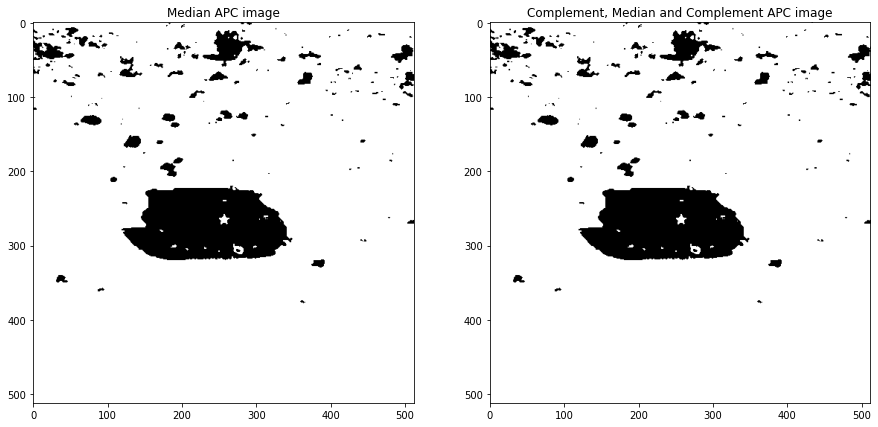

In [32]:
apc_median_image = medianFilter(apc_binary_image, square_3)
apc_through_median = complementImage(medianFilter(complementImage(apc_binary_image), square_3))

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 2, 1)
plt.title(f"Median APC image")
plt.imshow(apc_median_image, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Complement, Median and Complement APC image")
plt.imshow(apc_through_median, cmap = 'gray')

plt.show()

Clearly the difference between images are zero

## Open and Close compound operators <a name = '23'></a>

In [33]:
def openImage(image, window):
    return dialateFilter(erodeFilter(image, window), window)

def closeImage(image, window):
    return erodeFilter(dialateFilter(image, window), window)

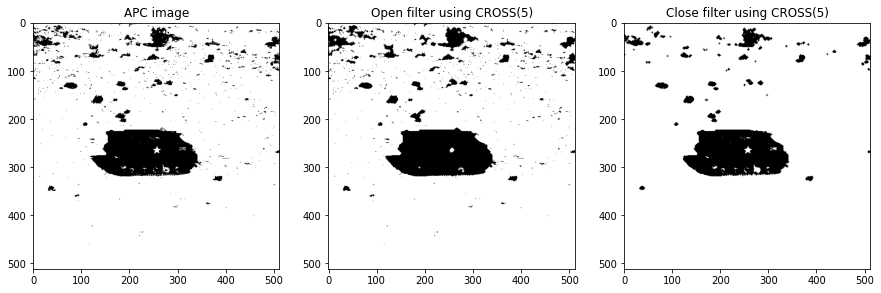

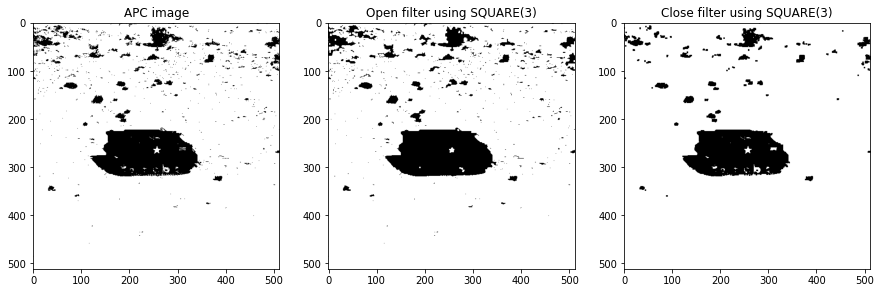

In [34]:
fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Open filter using CROSS(5)")
plt.imshow(openImage(apc_binary_image, cross_5), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Close filter using CROSS(5)")
plt.imshow(closeImage(apc_binary_image, cross_5), cmap = 'gray')

plt.show()

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Open filter using SQUARE(3)")
plt.imshow(openImage(apc_binary_image, square_3), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Close filter using SQUARE(3)")
plt.imshow(closeImage(apc_binary_image, square_3), cmap = 'gray')

plt.show()

## Open-Clos and Clos-Open operators <a name = '24'></a>

In [35]:
def OpenClos(image, window):
    return openImage(closeImage(image, window), window)

def ClosOpen(image, window):
    return closeImage(openImage(image, window), window)

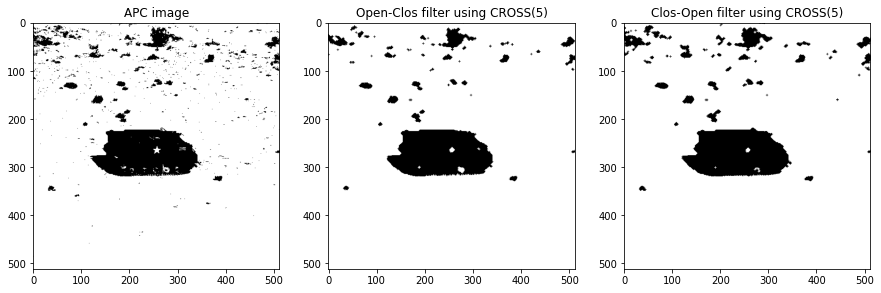

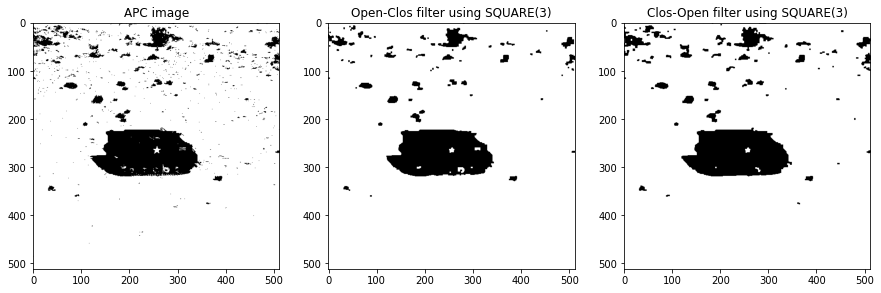

In [36]:
fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Open-Clos filter using CROSS(5)")
plt.imshow(OpenClos(apc_binary_image, cross_5), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Clos-Open filter using CROSS(5)")
plt.imshow(ClosOpen(apc_binary_image, cross_5), cmap = 'gray')

plt.show()

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 3, 1)
plt.title(f"APC image")
plt.imshow(apc_binary_image, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title(f"Open-Clos filter using SQUARE(3)")
plt.imshow(OpenClos(apc_binary_image, square_3), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title(f"Clos-Open filter using SQUARE(3)")
plt.imshow(ClosOpen(apc_binary_image, square_3), cmap = 'gray')

plt.show()

## Pixel count in object of interest <a name = '25'></a>

We can count the number of Non-Zero intensities in APC image after performing the following operation on blob removed image- <br>
Blob Removed Image -> Invert -> Blob Removal -> Invert -> Count pixels

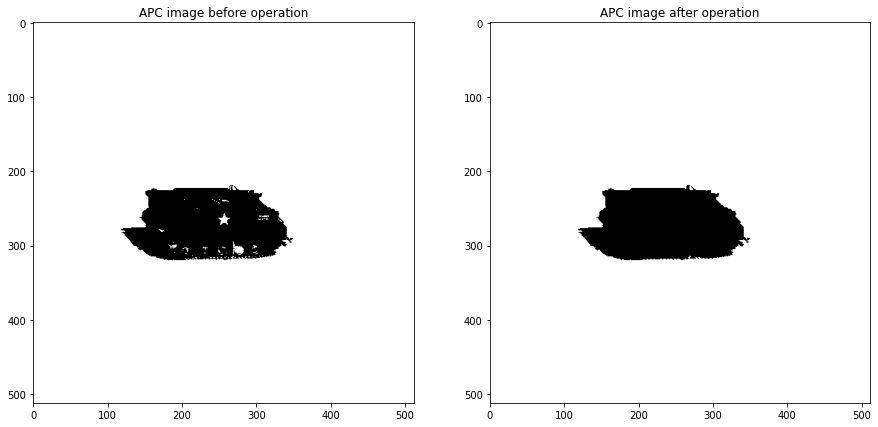

In [37]:
invert1 = complementImage(apc_blob_removed)
invert1_blob_removed = returnMinorBlobRemoved(invert1.copy(), 
                                              returnConnectedComponents(invert1).copy(), arg = -1)
invert2 = complementImage(invert1_blob_removed)

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 2, 1)
plt.title(f"APC image before operation")
plt.imshow(apc_blob_removed, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"APC image after operation")
plt.imshow(invert2, cmap = 'gray')

plt.show()

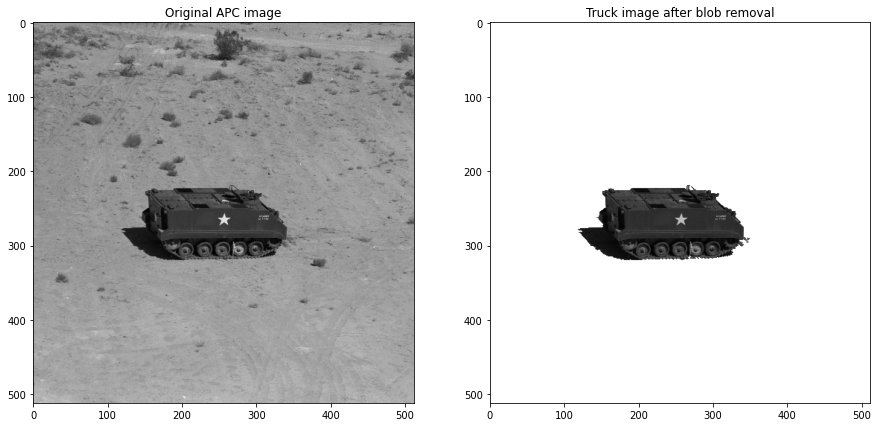

In [38]:
truck_only = np.where(invert2 == 0, apc, 256)

fig = plt.figure(figsize = (15, 14))

plt.subplot(1, 2, 1)
plt.title(f"Original APC image")
plt.imshow(apc, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title(f"Truck image after blob removal")
plt.imshow(truck_only, cmap = 'gray')

plt.show()

In [39]:
pixel_count = len(invert2.flatten()) - np.sum(invert2.flatten())
print(f"Pixel count in object of interest: {pixel_count}")

Pixel count in object of interest: 17085.0
